# I GOT A MASSIVE CHANGE IN MY REGRESSION BY INLCLUDING MODEL (incresed predictiblity)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### LOADING THE DATA

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')

### EXPLORING THE DATA

In [3]:
raw_data.head(20)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


# PREPROCESSING

### Exploring the descriptive statistics of the variables

In [4]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
#Don't work with model as it is not relevant to price
data_no_model = raw_data.drop("Model",axis=1)

# LETS work with model to find how it is useful
data_with_model = raw_data

In [6]:
data_no_model

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


### Total missing values

In [7]:
data_no_model.isnull()
# data_no_model[data_no_model.isnull()]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [8]:
data_no_model.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
# DATA WITH NO NULL VALUES

In [10]:
data_no_null = data_no_model.dropna(axis=0)



#### WE ARE USING MODEL FOR TESTING PURPOSE #####
data_no_null = data_with_model.dropna(axis=0)

data_no_null

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [11]:
data_no_null.isnull().sum()  #CINFIRMED NO NULL OR NA VALUE IN DATA SET

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [12]:
data_no_null.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### EXPLORING THE PDF

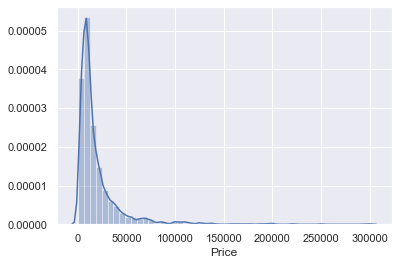

In [13]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_null['Price'])

In [14]:
# WE CAN SEE TO MANY OUTLIERS IN PRICE, SO WE NEED TO GET RID OFF IT

### DEALING WITH OUTLIERS

In [15]:
# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price
# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

In [16]:
data_no_null['Price'].quantile(0.99)

129812.51999999981

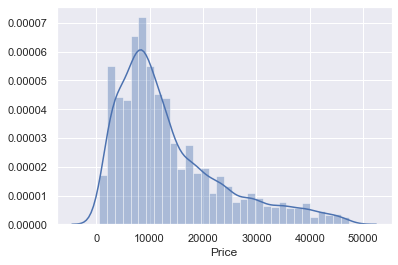

In [17]:
q = data_no_null['Price'].quantile(0.92)
data_no_outlier_price = data_no_null[data_no_null['Price'] < q]
sns.distplot(data_no_outlier_price['Price'])

In [18]:
# LOOKS LIKE LEFT SKEW RIGHT ??

In [19]:
data_no_outlier_price.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3703,3703.000000,3703,3703.000000,3703.000000,3703,3703,3703.000000,3703
unique,7,NaN,6,NaN,NaN,4,2,NaN,284
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,856,NaN,1471,NaN,NaN,1649,3332,NaN,187
mean,NaN,13627.878048,NaN,174.531731,2.699816,NaN,NaN,2005.705644,NaN
std,NaN,10014.350491,NaN,97.851098,5.129601,NaN,NaN,6.531128,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6700.000000,NaN,107.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,10500.000000,NaN,167.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,18000.000000,NaN,238.000000,2.800000,NaN,NaN,2011.000000,NaN


In [20]:
# NOW WE WILL GO for OTHER VARIABLES

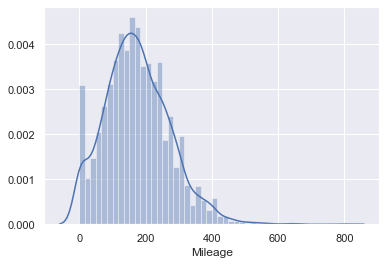

In [21]:
sns.distplot(data_no_outlier_price['Mileage'])

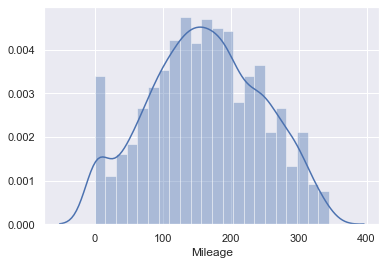

In [22]:
m = data_no_outlier_price['Mileage'].quantile(0.95)
data_no_outlier_price_milage = data_no_outlier_price[data_no_outlier_price['Mileage'] < m]
sns.distplot(data_no_outlier_price_milage["Mileage"])

In [23]:
## LOOKS GREAT !!

In [24]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75

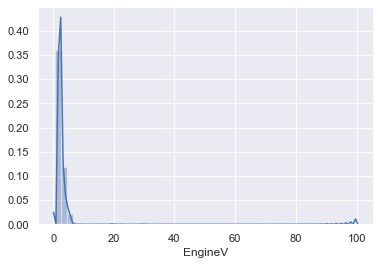

In [25]:
sns.distplot(data_no_outlier_price_milage['EngineV'])

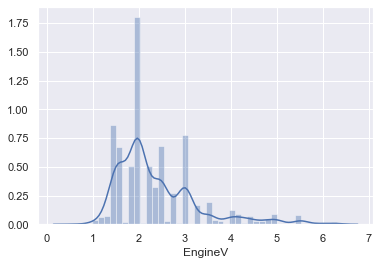

In [26]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l https://en.wikipedia.org/wiki/Engine_displacement
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_no_outlier_price_milage_engine = data_no_outlier_price_milage[data_no_outlier_price_milage['EngineV']<6.5]
sns.distplot(data_no_outlier_price_milage_engine['EngineV'])

In [27]:
data_no_outlier_price_milage_engine

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


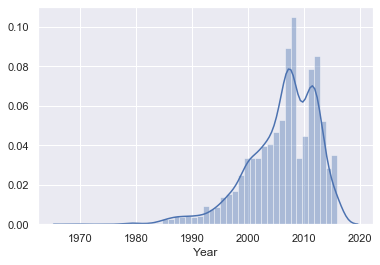

In [28]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.distplot(data_no_outlier_price_milage_engine['Year'])

In [29]:
data_no_outlier_price_milage_engine.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3490,3490.000000,3490,3490.000000,3490.000000,3490,3490,3490.000000,3490
unique,7,NaN,6,NaN,NaN,4,2,NaN,272
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,813,NaN,1356,NaN,NaN,1538,3148,NaN,162
mean,NaN,14097.722754,NaN,161.846418,2.372642,NaN,NaN,2006.234957,NaN
std,NaN,10080.350512,NaN,82.725353,0.908897,NaN,NaN,6.176893,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,102.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,10999.500000,NaN,160.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,18700.000000,NaN,222.000000,2.800000,NaN,NaN,2011.000000,NaN


In [30]:
# I'll simply remove them
q = data_no_outlier_price_milage_engine['Year'].quantile(0.02)
data_no_outlier_price_milage_engine_year = data_no_outlier_price_milage_engine[data_no_outlier_price_milage_engine['Year']>q]

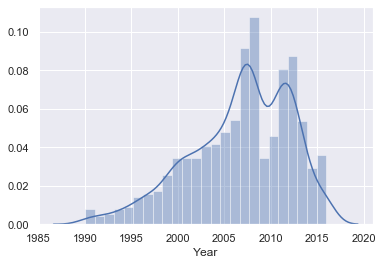

In [31]:
sns.distplot(data_no_outlier_price_milage_engine_year['Year'])

In [32]:
data_no_outlier_price_milage_engine_year

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
...,...,...,...,...,...,...,...,...,...
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [33]:
## Looks like INDEXES GOT MESSED UP...NO WORRY WE WILL RESOLVE IT

In [34]:
final_clean_data = data_no_outlier_price_milage_engine_year.reset_index(drop="True")

In [35]:
final_clean_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
2,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
3,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
4,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
...,...,...,...,...,...,...,...,...,...
3409,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane
3410,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
3411,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3412,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [36]:
final_clean_data.describe()

,Price,Mileage,EngineV,Year
count,3414.000000,3414.000000,3414.000000,3414.000000
mean,14343.663023,161.223199,2.382021,2006.686292
std,10037.739695,81.867751,0.914249,5.421550
min,800.000000,0.000000,0.600000,1990.000000
25%,7300.000000,102.000000,1.800000,2003.000000
50%,11300.000000,160.000000,2.000000,2007.000000
75%,18900.000000,220.000000,2.800000,2011.000000
max,47300.000000,345.000000,6.300000,2016.000000


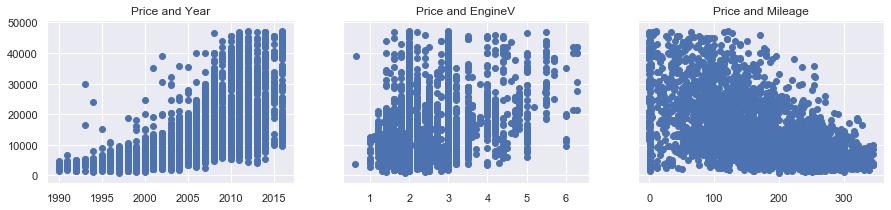

In [37]:
# Here we decided to use some matplotlib code, without explaining it
# WE can simply use plt.scatter() for each of them (with our current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(final_clean_data['Year'],final_clean_data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(final_clean_data['EngineV'],final_clean_data['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(final_clean_data['Mileage'],final_clean_data['Price'])
ax3.set_title('Price and Mileage')


plt.show()

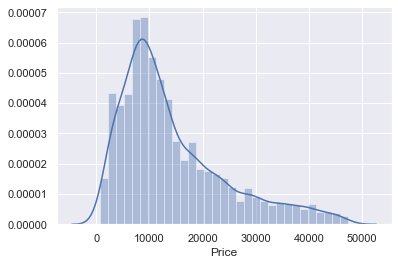

In [38]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(final_clean_data['Price'])

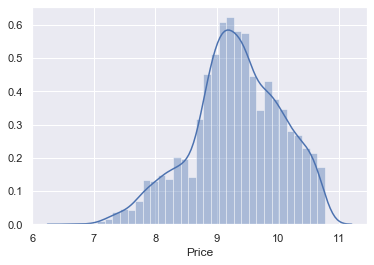

In [39]:
# Let's transform 'Price' with a log transformation
log_price = np.log(final_clean_data['Price'])
sns.distplot(log_price)

In [40]:
# NOW LOOKS GOOD..a normal distribution

In [41]:
final_clean_data['logged_price'] = log_price
final_clean_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,logged_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
2,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
3,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6,9.560997
4,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane,9.287209
...,...,...,...,...,...,...,...,...,...,...
3409,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane,8.824678
3410,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3411,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3412,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


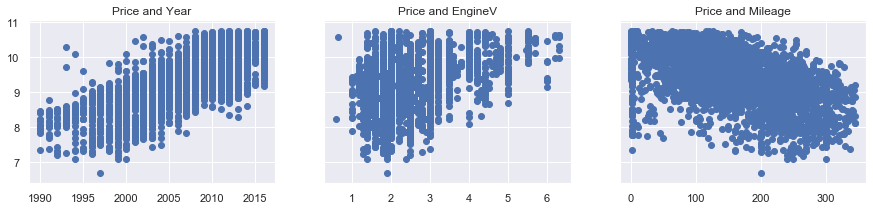

In [42]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(final_clean_data['Year'],final_clean_data['logged_price'])
ax1.set_title('Price and Year')
ax2.scatter(final_clean_data['EngineV'],final_clean_data['logged_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(final_clean_data['Mileage'],final_clean_data['logged_price'])
ax3.set_title('Price and Mileage')


plt.show()

### MULTICOLLINEARITY

In [43]:
# Let's quickly see the columns of our data frame
final_clean_data.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'logged_price'], dtype=object)

In [44]:
# sklearn does not have a built-in way to check for multicollinearity
# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = final_clean_data[['Mileage','Year','EngineV']]

In [45]:
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [46]:
vif

,VIF,Features
0,4.909799,Mileage
1,10.575247,Year
2,7.880009,EngineV


In [47]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = final_clean_data.drop(['Year'],axis=1)

### CREATING A DUMMY VALUES

In [48]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [49]:
# Here's the result
data_with_dummies.head()

,Price,Mileage,EngineV,logged_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23000.0,240,4.2,10.043249,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18300.0,120,2.0,9.814656,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,14200.0,200,2.7,9.560997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10799.0,193,1.5,9.287209,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# REARRANGE

In [51]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'logged_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_116', 'Model_118', 'Model_120', 'Model_19',
       'Model_190', 'Model_200', 'Model_210', 'Model_220', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_428', 'Model_4Runner',
       'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_630', 'Model_645', 'Model_650', 'Model_730',
       'Model_735', 'Model_740', 'Model_745', 'Model_750', 'Model_760',
       'Model_80', 'Model_A 140', 'Model_A 150', 'Model_A 170',
       'Model_A 180', 'Model_

In [52]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['logged_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_116', 'Model_118', 'Model_120', 'Model_19',
       'Model_190', 'Model_200', 'Model_210', 'Model_220', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_428', 'Model_4Runner',
       'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_630', 'Model_645', 'Model_650', 'Model_730',
       'Model_735', 'Model_740', 'Model_745', 'Model_750', 'Model_760',
       'Model_80', 'Model_A 140', 'Model_A 150', 'Model_A 170',
       'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4',
       'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad',
       'Model_A7', 'Model_A8', 'Model_ASX', 'Model_Amarok', 'Model_Auris',
       'Model_Avalon', 'Model_Avensis', 'Model_Aygo', 'Model_B 170',
       'Model_B 180', 'Model_B 200', 'Model_Beetle', 'Model_Bora',
       'Model_C-Class', 'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG',
       'Model_CL 550', 'Model_CL 63 AMG', 'Model_CLA 200',
       'Model_CLA 220', 'Model_CLA-Class', 'Model_CLC 180',
       'Model_CLC 200', 'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230',
       'Model_CLK 240', 'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430',
       'Model_CLS 350', 'Model_CLS 63 AMG', 'Model_Caddy', 'Model_Camry',
       'Model_Captur', 'Model_Caravelle', 'Model_Carina', 'Model_Carisma',
       'Model_Celica', 'Model_Clio', 'Model_Colt', 'Model_Corolla',
       'Model_Corolla Verso', 'Model_Cross Touran', 'Model_Dokker',
       'Model_Duster', 'Model_E-Class', 'Model_Eclipse', 'Model_Eos',
       'Model_Espace', 'Model_FJ Cruiser', 'Model_Fluence',
       'Model_Fortuner', 'Model_G 320', 'Model_G 500', 'Model_G 63 AMG',
       'Model_GL 320', 'Model_GL 420', 'Model_GL 450', 'Model_GL 500',
       'Model_GL 550', 'Model_GLK 220', 'Model_GLK 300', 'Model_Galant',
       'Model_Golf GTI', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 80', 'Model_Land Cruiser Prado',
       'Model_Latitude', 'Model_Logan', 'Model_Lupo', 'Model_M5',
       'Model_ML 250', 'Model_ML 270', 'Model_ML 280', 'Model_ML 320',
       'Model_ML 350', 'Model_ML 400', 'Model_ML 430', 'Model_ML 500',
       'Model_ML 550', 'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix',
       'Model_Megane', 'Model_Modus', 'Model_Multivan',
       'Model_New Beetle', 'Model_Outlander', 'Model_Outlander XL',
       'Model_Pajero', 'Model_Pajero Pinin', 'Model_Pajero Sport',
       'Model_Pajero Wagon', 'Model_Passat B3', 'Model_Passat B4',
       'Model_Passat B5', 'Model_Passat B6', 'Model_Passat B7',
       'Model_Passat B8', 'Model_Passat CC', 'Model_Phaeton',
       'Model_Pointer', 'Model_Polo', 'Model_Previa', 'Model_Prius',
       'Model_Q3', 'Model_Q5', 'Model_Q7', 'Model_R 320', 'Model_Rav 4',
       'Model_S 140', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S4', 'Model_S5',
       'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Sprinter 212',
       'Model_Sprinter 213', 'Model_Sprinter 311', 'Model_Sprinter 312',
       'Model_Sprinter 313', 'Model_Sprinter 315', 'Model_Sprinter 316',
       'Model_Sprinter 318', 'Model_Sprinter 319', 'Model_Symbol',
       'Model_Syncro', 'Model_T4 (Transporter)',
       'Model_T4 (Transporter) ', 'Model_T5 (Transporter)',
       'Model_T5 (Transporter) ', 'Model_T6 (Transporter)',
       'Model_T6 (Transporter) ', 'Model_TT', 'Model_Tacoma',
       'Model_Tiguan', 'Model_Touareg', 'Model_Touran', 'Model_Trafic',
       'Model_Tundra', 'Model_Up', 'Model_Vaneo', 'Model_Vento',
       'Model_Venza', 'Model_Viano', 'Model_Virage', 'Model_Vista',
       'Model_Vito', 'Model_X1', 'Model_X3', 'Model_X5', 'Model_X5 M',
       'Model_X6', 'Model_X6 M', 'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [53]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,logged_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.043249,240,4.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.814656,120,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.560997,200,2.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.287209,193,1.5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# LINEAR REGRESSION MODEL

### Declare the inputs and the targets¶

In [54]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['logged_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['logged_price'],axis=1)

### SCALING INPUTS

In [55]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### TRAIN TEST SPLIT

In [57]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### CREATING REGRESSION

In [58]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

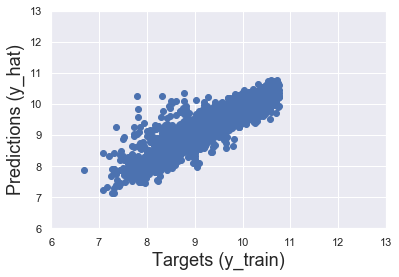

In [60]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

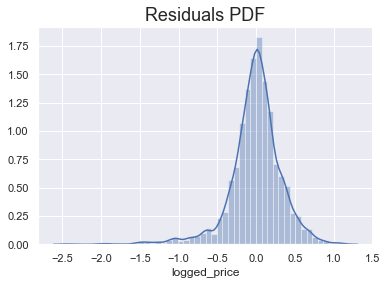

In [61]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [62]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.7930216310906952

### FINDING WEIGHTS (coef) AND BIAS(inttercept)

In [63]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-2.737837e-01
1,EngineV,5.703973e-02
2,Brand_BMW,-1.424686e+12
3,Brand_Mercedes-Benz,-1.521550e+12
4,Brand_Mitsubishi,-4.240495e+12
...,...,...
268,Model_X6,1.418762e-01
269,Model_X6 M,-1.910067e+11
270,Model_Yaris,1.004100e+12
271,Model_Z3,-1.185039e+12


In [64]:
reg.intercept_

-52702144320.550735

## TESTING

In [65]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

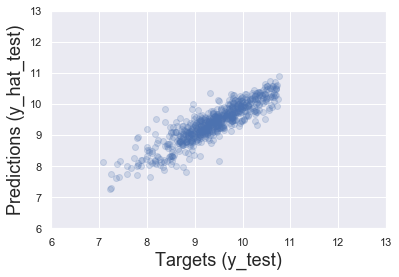

In [66]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [67]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


,Prediction
0,3922.403328
1,29324.498997
2,8865.206627
3,7033.531557
4,13476.635597


In [68]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,3922.403328,NaN
1,29324.498997,NaN
2,8865.206627,NaN
3,7033.531557,NaN
4,13476.635597,NaN
...,...,...
678,17069.369749,NaN
679,19687.537274,NaN
680,22027.474109,NaN
681,8247.157722,13300.0


In [69]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    8.536996
1    9.798127
2    8.922658
3    8.732305
4    9.546455
Name: logged_price, dtype: float64

In [70]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,3922.403328,5100.0
1,29324.498997,18000.0
2,8865.206627,7500.0
3,7033.531557,6200.0
4,13476.635597,13995.0
...,...,...
678,17069.369749,34000.0
679,19687.537274,19500.0
680,22027.474109,28900.0
681,8247.157722,7700.0


In [71]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [72]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,3922.403328,5100.0,1177.596672,23.090131
1,29324.498997,18000.0,-11324.498997,62.913883
2,8865.206627,7500.0,-1365.206627,18.202755
3,7033.531557,6200.0,-833.531557,13.444057
4,13476.635597,13995.0,518.364403,3.703926
...,...,...,...,...
678,17069.369749,34000.0,16930.630251,49.795971
679,19687.537274,19500.0,-187.537274,0.961730
680,22027.474109,28900.0,6872.525891,23.780366
681,8247.157722,7700.0,-547.157722,7.105944


In [73]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,6.830000e+02,683.000000,6.830000e+02,683.000000
mean,inf,14869.627160,-inf,inf
std,NaN,10076.229017,NaN,NaN
min,0.000000e+00,1200.000000,-inf,0.004014
25%,8.231081e+03,7625.000000,-1.768300e+03,7.948762
50%,1.213951e+04,11990.000000,1.642056e+02,18.103993
75%,1.834753e+04,19450.000000,2.389061e+03,32.505014
max,inf,47300.000000,4.550000e+04,inf


In [74]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
377,9200.37,9200.00,-0.37,0.00
160,28481.32,28500.00,18.68,0.07
512,7455.24,7450.00,-5.24,0.07
329,11829.38,11800.00,-29.38,0.25
102,15927.89,15999.00,71.11,0.44
450,3516.02,3500.00,-16.02,0.46
49,10844.66,10900.00,55.34,0.51
180,13279.04,13200.00,-79.04,0.60
404,15096.80,15000.00,-96.80,0.65
73,3277.29,3300.00,22.71,0.69
